# STATISTIK

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import imp

iris = datasets.load_iris()
iris1 = iris.data[0:50, :] # setosa
iris2 = iris.data[50:100, :] # versi-color
iris3 = iris.data[100:150, :] # virginica

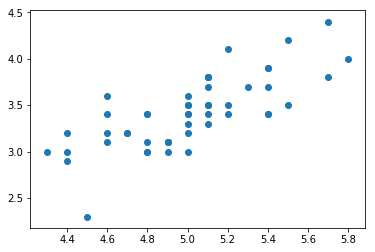

In [5]:
# scatter 2D
plt.scatter(iris1[:, 0], iris1[:, 1])

## Regresi

+ regresi linier -> y = mx + c
+ regresi fungsi kw -> y = ax^2 + bx + c
+ regresi fungsi ^3 -> y = ax^3 + ... + d
+ y = c log(x)
+ exp -> y = c(e^x)


In [9]:
iris1[0:8, 0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4]])

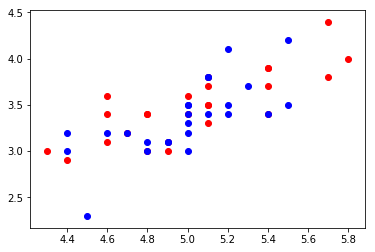

In [11]:
iris1train = iris1[0:25, 0:2]
iris1test = iris1[25:50, 0:2]

plt.scatter(iris1train[:, 0], iris1train[:, 1], c = 'r')
plt.scatter(iris1test[:, 0], iris1test[:, 1], c = 'b')

In [12]:
iris1train[0:8, :]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4]])

In [13]:
c1 = iris1train[:, 0] # kolom 1
m_ones = np.ones(25) # matriks ones
X = np.c_[c1, m_ones]
X.shape

(25, 2)

In [14]:
X[0:8, :]

array([[5.1, 1. ],
       [4.9, 1. ],
       [4.7, 1. ],
       [4.6, 1. ],
       [5. , 1. ],
       [5.4, 1. ],
       [4.6, 1. ],
       [5. , 1. ]])

In [17]:
y = iris1train[:, 1]
y[0:8]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4])

In [16]:
r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.73602743, -0.2207459 ])

In [18]:
# regresi fungsi kuadrat
c1 = iris1train[:, 0]
c1sq = c1 * c1
m_ones = np.ones(25)
X = np.c_[c1sq, c1, m_ones]

y = iris1train[:, 1]
y[0:8]

r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)

array([ 0.18186533, -1.10844522,  4.4275543 ])

In [20]:
m = 0.73602743 # median
c = -0.2207459
A = 0.18186533
B = -1.10844522
C = 4.4275543

XX = np.arange(0, 10, 0.05)
XX.shape

(200,)

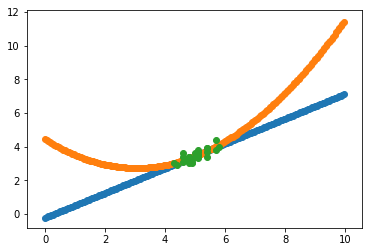

In [22]:
YY1 = m * XX + c
YY2 = A * XX * XX + B * XX + C

plt.scatter(XX, YY1)
plt.scatter(XX, YY2)
plt.scatter(iris1train[:, 0], iris1train[:, 1])

# oranye prediksi fungsi kuadrat
# biru prediksi fungsi linear
# hijau yg data train
# nilai prediksi yg bagus -> yg jaraknya paling kecil thdp data train (makin dekat)

In [24]:
c1 = iris1train[:, 0]
c1sq = c1 * c1
c1cb = c1 * c1 * c1
m_ones = np.ones(25)
X = np.c_[c1cb, c1sq, c1, m_ones]
y = iris1train[:, 1]

r1 = np.matmul(X.T, y)
r2 = np.matmul(X.T, X)
r2inv = np.linalg.inv(r2)
b = np.matmul(r2inv, r1)
b

array([ 0.02187962, -0.14971117,  0.55868014,  1.64655263])

array([[5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1]])

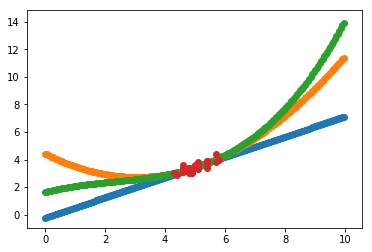

In [28]:
P = b[0]
Q = b[1]
R = b[2]
S = b[3]

YY1 = m * XX + c
YY2 = A * XX * XX + B * XX + C
YY3 = P * XX * XX * XX + Q * XX * XX + R * XX + S

plt.scatter(XX, YY1)
plt.scatter(XX, YY2)
plt.scatter(XX, YY3)
plt.scatter(iris1train[:, 0], iris1train[:, 1])

iris1test[0:8, :]

In [29]:
c1 = iris1test[:, 0]
y = iris1test[:, 1]
YY1 = m * c1 + c 
YY1[0:8]

array([3.45939125, 3.45939125, 3.60659674, 3.60659674, 3.23858302,
       3.31218576, 3.75380222, 3.60659674])

In [31]:
# rata-rata kuadrat error dari model linier
e = YY1 - y
np.mean(e * e)

0.08433025143416051

In [30]:
# rata-rata kuadrat error dari model fungsi kuadrat
YY2 = A * c1 * c1 + B * c1 + C
e = YY2 - y
np.mean(e * e)

0.08372222988638929

In [32]:
YY3 = P * c1 * c1 * c1 + Q * c1 * c1 + R * c1 + S
e = YY3 - y
np.mean(e * e)

0.08386477008696984

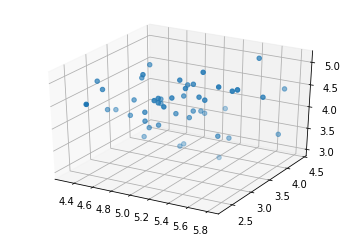

In [6]:
# scatter 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(iris1[:, 0], iris1[:, 1], iris2[:, 2])

In [39]:
X = iris.data[0: 100, 0:2] # 2 attr
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [35]:
y = iris.target[0:100] # label -> ada 2 kategori
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

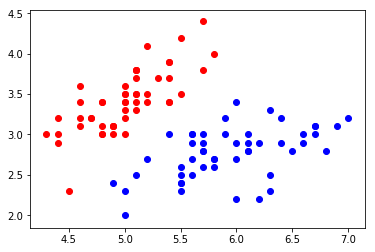

In [40]:
plt.scatter(X[0:50, 0], X[0:50, 1], c = 'r')
plt.scatter(X[50:100, 0], X[50:100, 1], c = 'b')

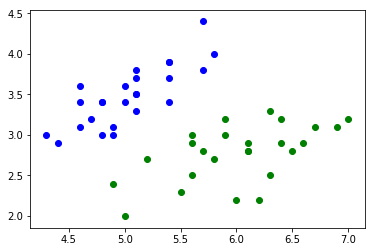

In [41]:
X1 = X[0:25, 0:2]
X2 = X[50:75, 0:2]

plt.scatter(X1[:, 0], X1[:, 1], c = 'b')
plt.scatter(X2[:, 0], X2[:, 1], c = 'g')

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(X = 1e5, solver = 'lbfgs')
X = np.vstack((np.zeros(25)))